# Reporte Técnico

## Importes

In [9]:
import os 
import pandas as pd
import matplotlib.pyplot as plt

## Introducción

El departamento de transporte de Estados Unidos, tiene un conjunto de datos con los retrasos aéreos para el mes de julio de los últimos cinco años, el departamento requiere el análisis y reporte de datos para diagnosticar esta problemática y exponer los hallazgos respecto a los retrasos.

## Lectura Datos

In [4]:
ruta_carpeta = "./data"
lista_df = []
for archivo in os.listdir(ruta_carpeta):
    
    if archivo.endswith('.csv') and 'Delay' in archivo:
        ruta_archivo = os.path.join(ruta_carpeta, archivo)
        
        df = pd.read_csv(ruta_archivo)
        lista_df.append(df)

df_total = pd.concat(lista_df, ignore_index=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13576\3399459747.py:9: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_13576\3399459747.py:9: DtypeWarning: Columns (48,69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_13576\3399459747.py:9: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_13576\3399459747.py:9: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_13576\3399459747.py:9: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_me

## Análisis

### Valores Nulos

En el análisis de campos nulos, se encontraron varios campos donde la cantidad de nulos era la totalidad de registos que hay en los datasets o una gran parte de ellos, como se ve en la muestra a continuación:

In [16]:
null_columns = df_total.columns[df_total.isnull().any()]
df_total[null_columns].isna().sum().sort_values(ascending=False).to_frame(name='# Registros').head()

,# Registros
Unnamed: 109,3009651
Div4TailNum,3009651
Div4WheelsOff,3009651
Div4LongestGTime,3009651
Div4TotalGTime,3009651
Div4WheelsOn,3009651
Div4AirportSeqID,3009651
Div4AirportID,3009651
Div3AirportID,3009651
Div3AirportSeqID,3009651


Además, se encontraron columnas como la $Unnamed: 109$ que no está documentando en el schema de los datos. 

#### Limpieza de Campos Nulos

A continuación se eliminan las filas que tengan todos sus campos nulos, se hace por fila ya que por columna se eliminarían todos por lo visto en el apartado anterior

In [ ]:
df_sin_nulos = df_total.dropna(axis=1, how='all')

## Eliminación de Columnas

Se eliminan columnas que tengan id o div

In [ ]:
columnas_con_id = [col for col in df_sin_nulos.columns if 'id' in col.lower()]

df_sin_id = df_sin_nulos.drop(columns=columnas_con_id)

In [7]:
df_sin_divs = df_sin_id[
    [
        'Year', 'DayofMonth', 'DayOfWeek', 'FlightDate',
        'Origin', 'OriginCityName', 'OriginState', 'OriginStateName',
        'Dest', 'DestCityName', 'DestState', 'DestStateName',
        'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
        'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
        'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
        'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
        'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime',
        'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup',
        'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
        'LateAircraftDelay', 'FirstDepTime', 'TotalAddGTime', 'LongestAddGTime'
    ]
]

,Year,DayofMonth,DayOfWeek,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,TaxiOut,...,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
count,3.009651e+06,3.009651e+06,3.009651e+06,3.009651e+06,2.948555e+06,2.948483e+06,2.948483e+06,2.948483e+06,2.948483e+06,2.946662e+06,...,3.009651e+06,3.009651e+06,768308.000000,768308.000000,768308.000000,768308.000000,768308.000000,23188.000000,23184.000000,23184.000000
mean,2.022428e+03,1.611910e+01,4.052370e+00,1.335724e+03,1.338456e+03,1.819137e+01,2.076633e+01,2.646700e-01,5.009953e-01,1.707126e+01,...,8.315932e+02,3.795292e+00,27.253495,4.129603,12.084959,0.156062,30.663941,1403.287735,43.570480,42.571127
std,1.026700e+00,8.902021e+00,2.014421e+00,4.989687e+02,5.214389e+02,6.235269e+01,6.139561e+01,4.411574e-01,2.661977e+00,9.736292e+00,...,6.062937e+02,2.371676e+00,77.533000,28.350653,31.499319,4.065797,63.485679,498.560727,38.009775,36.296047
min,2.021000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.900000e+01,0.000000e+00,0.000000e+00,-2.000000e+00,1.000000e+00,...,1.100000e+01,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2.022000e+03,8.000000e+00,2.000000e+00,9.100000e+02,9.090000e+02,-5.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.200000e+01,...,3.930000e+02,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1015.000000,18.000000,18.000000
50%,2.022000e+03,1.600000e+01,4.000000e+00,1.325000e+03,1.326000e+03,-1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.500000e+01,...,6.750000e+02,3.000000e+00,6.000000,0.000000,0.000000,0.000000,7.000000,1448.000000,32.000000,31.000000
75%,2.023000e+03,2.400000e+01,6.000000e+00,1.745000e+03,1.757000e+03,1.600000e+01,1.600000e+01,1.000000e+00,1.000000e+00,1.900000e+01,...,1.065000e+03,5.000000e+00,25.000000,0.000000,15.000000,0.000000,37.000000,1802.000000,55.000000,54.000000
max,2.024000e+03,3.100000e+01,7.000000e+00,2.359000e+03,2.400000e+03,3.777000e+03,3.777000e+03,1.000000e+00,1.200000e+01,2.140000e+02,...,5.095000e+03,1.100000e+01,3689.000000,1478.000000,1740.000000,1132.000000,2557.000000,2400.000000,372.000000,372.000000


## Consolidación de Dataset

In [8]:

df_sin_divs.to_csv(ruta_carpeta + '/archivo.csv', index=False)


print("Archivo CSV guardado correctamente.")

df = pd.read_csv(ruta_carpeta + '/archivo.csv')

Archivo CSV guardado correctamente.


## Causa de Retraso más Frecuente

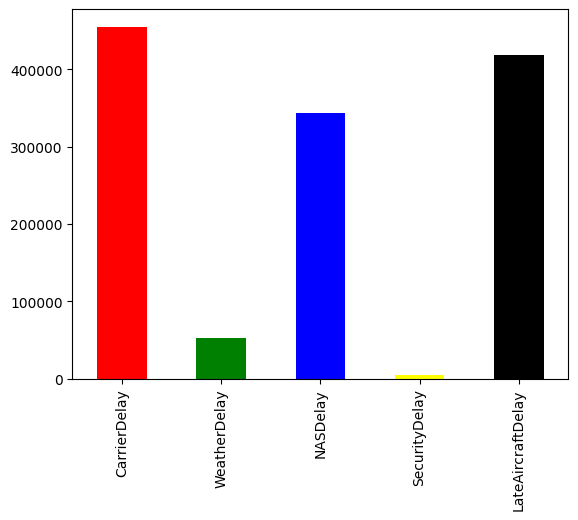

In [38]:
delay_columns = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
df_delay = df[delay_columns ]
df_delay = df_delay.fillna(0)

for delay_column in delay_columns:
    df_delay[delay_column] = df_delay[delay_column].apply(lambda x: 1 if x > 0 else 0)
df_delay.sum().plot.bar(x='Razones de Retraso', y='Frecuencia', color=['red', 'green', 'blue', 'yellow', 'black'])
plt.show()

La causa más frecuente de retraso es por carrier

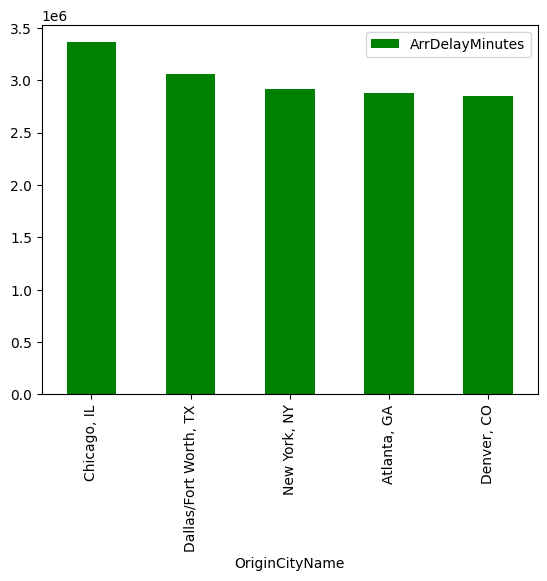

In [42]:
delay_columns = ['OriginCityName', 'ArrDelayMinutes']
df_delay = df[delay_columns]
df_delay = df_delay.fillna(0)

ax = df_delay.groupby('OriginCityName').sum().sort_values('ArrDelayMinutes', ascending=False).head(5).plot.bar(color=['green'])
plt.show()

## Ciudad con más Retrasos en Llegada

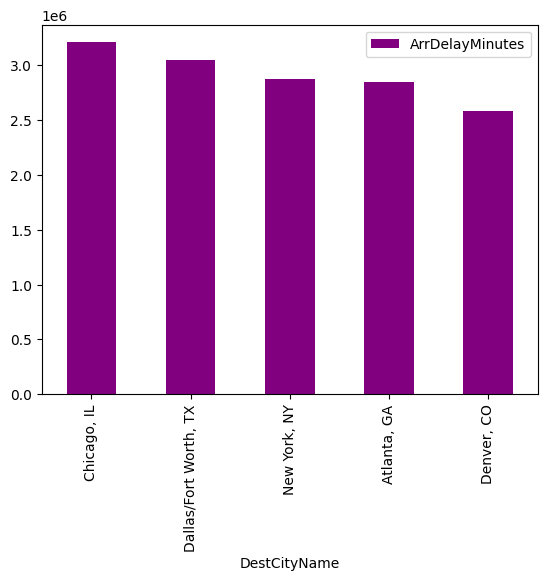

In [44]:
delay_columns = ['DestCityName', 'ArrDelayMinutes']
df_delay = df[delay_columns]
df_delay = df_delay.fillna(0)
ax = df_delay.groupby('DestCityName').sum().sort_values('ArrDelayMinutes', ascending=False).head(5).plot.bar(color=['purple'])

plt.show()

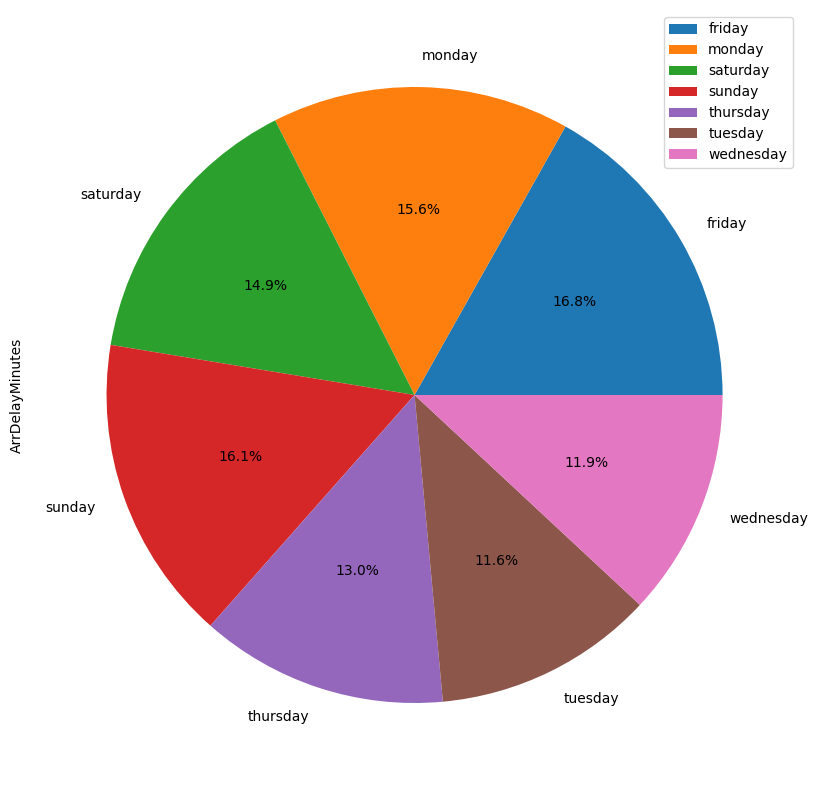

In [45]:
delay_columns = ['DayOfWeek', 'ArrDelayMinutes']
days_of_week_map = {1: 'monday', 2: 'tuesday', 3: 'wednesday', 4:'thursday', 5:'friday', 6:'saturday', 7:'sunday'}
df_delay = df[delay_columns]
df_delay = df_delay.fillna(0)

for delay_column in delay_columns:
    if 'DayOfWeek' == delay_column:
        df_delay[delay_column] = df_delay[delay_column].apply(lambda x: days_of_week_map[x])

df_delay.groupby('DayOfWeek').sum().plot.pie(subplots=True, figsize=(15, 10), autopct='%1.1f%%')
plt.show()


Los viernes es el día donde más se presenta retrasos

In [65]:
state_flights_columns = ['DestStateName', 'Flights']
df_state = df[state_flights_columns]

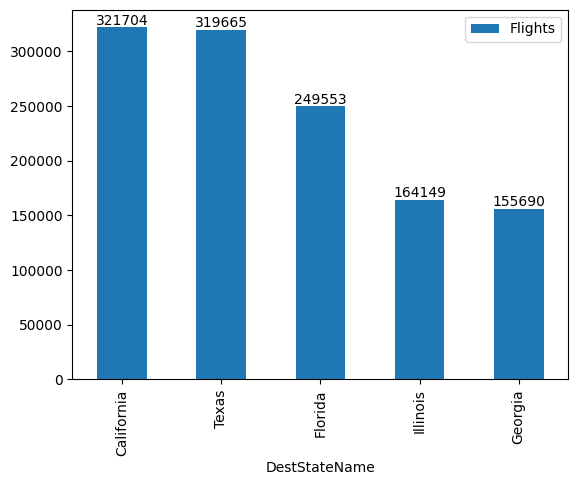

In [79]:
ax = df_state.groupby('DestStateName').sum().sort_values('Flights', ascending=False).head(5).plot.bar()

ax.bar_label(ax.containers[0])
plt.show()

El estado que presenta más vuelos es california